In [40]:
from google.colab import files

# Upload ZIP file
uploaded = files.upload()



Saving archive.zip to archive (1).zip


In [21]:
import zipfile
from pathlib import Path

# Extract ZIP into a folder called "dataset"
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Set dataset path
DATASET_PATH = Path("dataset")

# List folders
print("✅ Extracted folders:")
print([f.name for f in DATASET_PATH.iterdir() if f.is_dir()])


✅ Extracted folders:
['dataset']


In [22]:
# 📦 Imports
from pathlib import Path
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from collections import defaultdict

# ✅ Set dataset path inside Colab or local path
DATASET_PATH = Path("dataset/dataset")

# ✅ Detect folders inside the dataset
CATEGORIES = sorted([f.name for f in DATASET_PATH.iterdir() if f.is_dir()])
class_names = CATEGORIES  # For predictions
print("✅ Detected symbol folders:", CATEGORIES)

# 🔁 Step 1: Print Image Count per Class
class_counts = defaultdict(int)
for category in CATEGORIES:
    folder_path = DATASET_PATH / category
    class_counts[category] = len(list(folder_path.glob("*")))

print("\n🔢 Image count per class:")
for c in sorted(class_counts):
    print(f"{c}: {class_counts[c]}")

# 📐 Image size
IMG_SIZE = 45

# 🖼️ Load and preprocess all images
data = []
for category in CATEGORIES:
    folder_path = DATASET_PATH / category
    label = CATEGORIES.index(category)

    for img_name in folder_path.iterdir():
        try:
            img = cv2.imread(str(img_name), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img, label])
        except Exception as e:
            print(f"⚠️ Error loading {img_name}: {e}")
            continue

print("\n✅ Total images loaded:", len(data))

# 🌀 Shuffle and split features & labels
random.shuffle(data)
X = np.array([d[0] for d in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = to_categorical([d[1] for d in data], num_classes=len(CATEGORIES))

# 📂 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("\n✅ Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)



✅ Detected symbol folders: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']

🔢 Image count per class:
0: 595
1: 562
2: 433
3: 541
4: 526
5: 433
6: 581
7: 533
8: 554
9: 547
add: 596
dec: 624
div: 618
eq: 634
mul: 577
sub: 655
x: 452
y: 399
z: 212
⚠️ Error loading dataset/dataset/9/.directory: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


✅ Total images loaded: 10071

✅ Shapes:
X_train: (8056, 45, 45, 1)
y_train: (8056, 19)
X_test: (2015, 45, 45, 1)
y_test: (2015, 19)


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(CATEGORIES), activation='softmax')  # Output layer
])

# ✅ Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)
# Save the trained model locally
model.save("symbol_classifier.h5")

model.save("/content/drive/MyDrive/MathSymbolModel/symbol_classifier.h5")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 43, 43, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 19, 19, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       663,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 19)             │         2,451 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,947 (2.61 MB)

 Trainable params: 684,947 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.1691 - loss: 2.6794 - val_accuracy: 0.6546 - val_loss: 1.3275
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.5692 - loss: 1.4249 - val_accuracy: 0.7851 - val_loss: 0.7931
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.6960 - loss: 0.9911 - val_accuracy: 0.8427 - val_loss: 0.5854
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.7683 - loss: 0.7466 - val_accuracy: 0.8655 - val_loss: 0.4647
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.8027 - loss: 0.6108 - val_accuracy: 0.8888 - val_loss: 0.3842
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.8237 - loss: 0.5454 - val_accuracy: 0.9057 - val_loss: 0.3454
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.8419 - loss: 0.4739 - val_accuracy: 0.9092 - val_loss: 0.3308
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - accuracy: 0.8533 - loss: 0

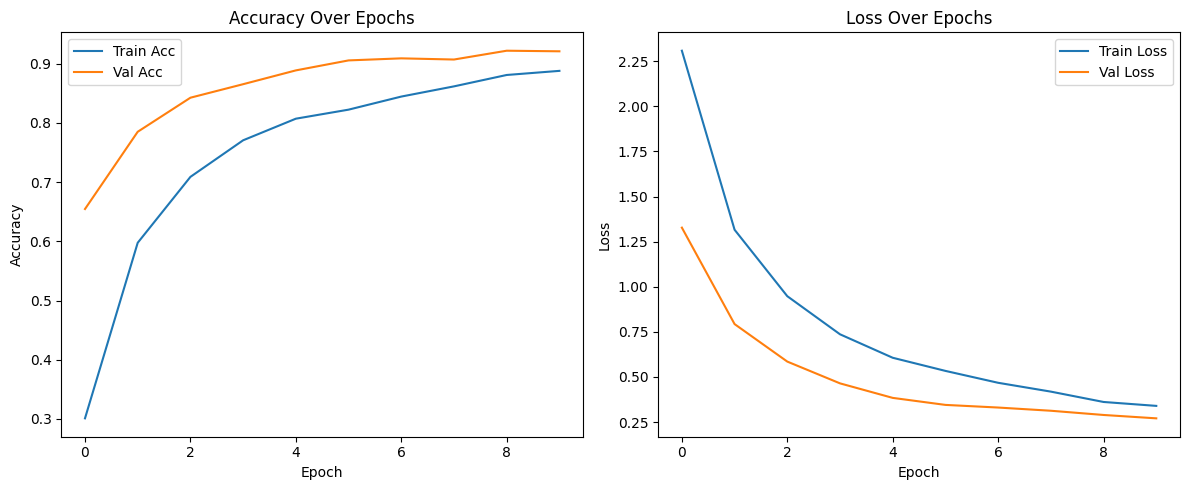

In [35]:
# 📈 Plot training history
plt.figure(figsize=(12, 5))

# 🔹 Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 🔹 Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
# 📊 Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")


63/63 - 1s - 18ms/step - accuracy: 0.9211 - loss: 0.2709
✅ Test Accuracy: 92.11%


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


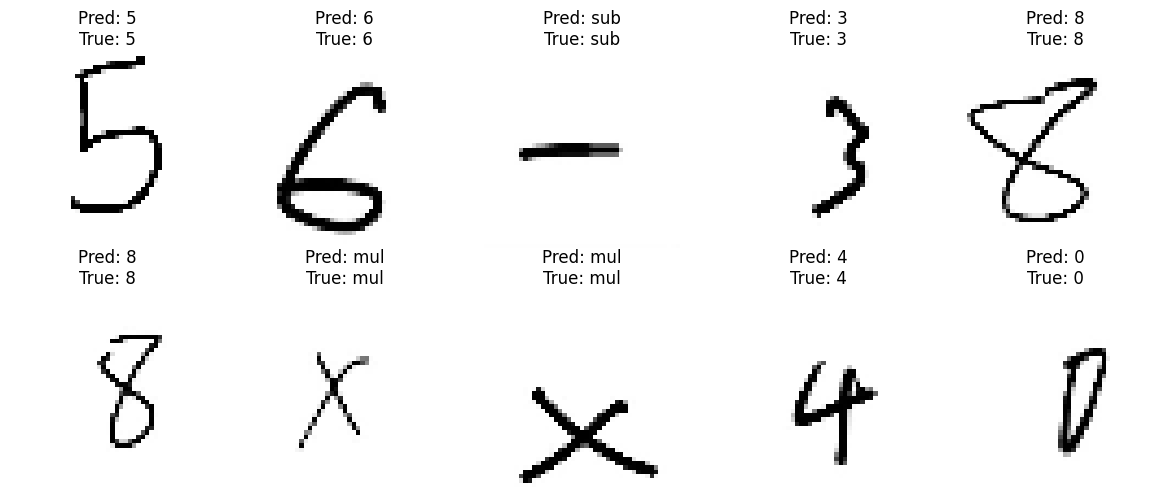

In [37]:
# 🧪 Predict on test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# 🔍 Show 10 random predictions
import random
plt.figure(figsize=(12, 5))

for i in range(10):
    idx = random.randint(0, len(X_test) - 1)
    img = X_test[idx].reshape(45, 45)
    pred = CATEGORIES[predicted_labels[idx]]
    truth = CATEGORIES[true_labels[idx]]

    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred}\nTrue: {truth}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [38]:
from google.colab import files
uploaded_files = files.upload()


Saving 3.png to 3 (1).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


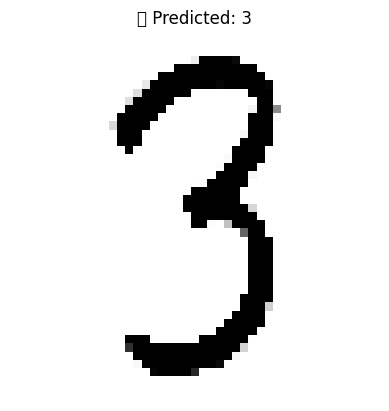

In [39]:
def preprocess_input_image(image_path, img_size=45):
    """Load, grayscale, resize, normalize and reshape the input image"""
    import cv2
    import numpy as np

    # Load in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    # Resize to target size
    img = cv2.resize(img, (img_size, img_size))

    # Normalize and reshape to match model input
    img = img / 255.0
    img = img.reshape(1, img_size, img_size, 1)  # batch of 1
    return img

img = preprocess_input_image("3.png")
prediction = model.predict(img)
predicted_label = class_names[np.argmax(prediction)]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"🔍 Predicted: {predicted_label}")
plt.axis("off")
plt.show()


